<a href="https://colab.research.google.com/github/a01110946/a01110946/blob/main/Equipo06_semana06y07_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

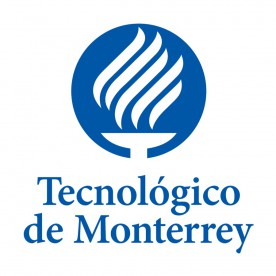

# **Maestría en Inteligencia Artificial Aplicada**
## **Curso: Inteligencia Artificial y Aprendizaje Automático**
### Tecnológico de Monterrey
### Prof. Luis Eduardo Falcón Morales

## **Actividad Semana 6**
### **Modelado de Tópicos - LSI/LDA**

Fernando Maytorena Espinosa de los Monteros | A01110946

Jonathan Garza Bennet | A01793038

Ernesto Enríquez Rubio | A01228409

David Andrés González Medina | A01794025

Helmy Andrea Moreno Navarro | A01793918

# **Preparación**

### **Dependencias**

In [1]:
%%capture
!pip install nltk
!pip install unidecode

In [2]:
%%capture
import json
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from unidecode import unidecode
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

nltk.download('stopwords')
nltk.download('punkt')

### **Ejercicio 1**

**Descarga el archivo *noticiasTopicModeling.txt* que se encuentra en Canvas. Este archivo consiste en  5,658 noticias de varios periódicos de España. El archivo de texto es una lista en el siguiente formato:**

 `[{“titular”:”Encabezado“, “texto”:”Cuerpo”}, … , {“titular”:”Encabezado”,”texto”:”Cuerpo”}]`
 
**Donde *“titular”* es el encabezado de la noticia y *“texto”* es el cuerpo del texto de dicha noticia. En  particular en esta actividad trabajarás solamente con los cuerpos de las noticias, sin incluir los  encabezados. Carga dicho archivo y genera un DataFrame de Pandas llamado “df” y que contiene  una única columna llamada *“noticia”¨* con 5,658 renglones formados por los cuerpos de las noticias.**

In [3]:
# Abrir el archivo para lectura
with open('noticiasTopicModeling.txt', 'r') as file:
    # Leer el contenido del archivo
    contenido = file.read()

# Decodificar el contenido JSON
datos = json.loads(contenido)

##### Versión Pandas DataFrame (Fernando)

In [4]:
print(datos[0])

{'titular': 'Vox se sube a la ola de la extrema derecha europea y marca el fin de la excepción española', 'texto': '"España ha dejado de ser católica", decía Manuel Azaña al comienzo de la Segunda República, cuando aquel Congreso de los Diputados aprobó las leyes laicistas. Era una metáfora, dejó de ser católica sobre el papel de la ley, pero no en las creencias de buena parte de su pueblo.                  Contra la migración y la integración europea: el programa de Vox para Europa Saber más           España, este domingo 10 de noviembre, ha dejado de ser una excepción en Europa por la potencia de la extrema derecha en su Parlamento. Pero también es una metáfora, pues precisamente lo excepcional era tener una dictadura a mediados de los setenta y que el dictador aún estuviera en un mausoleo después de 40 años muerto: no existía tal cosa ni en Portugal, Grecia, Italia y Alemania, países de  dictaduras fascistas.                   Pero en España, como sí pasó en Portugal, Italia y Alema

In [5]:
df = pd.DataFrame(datos)
df = df[['texto']]
df.head()

,texto
0,"""España ha dejado de ser católica"", decía Manu..."
1,El clima de crispación social en Ceuta ha lleg...
2,El Gobierno ha alegado la suspensión de plazos...
3,"Puedes mandar tu pregunta, sugerencia o queja ..."
4,Panamá debe entregar esta semana a la Corte In...


In [6]:
df.count()

texto    5658
dtype: int64

##### Versión lista de strings (Ernesto)

In [6]:
encabezados = []
textos = [] 

# Acceder a los elementos de la lista
for elemento in datos:
    encabezados.append(elemento['titular'])
    textos.append(elemento['texto'])

In [7]:
len(encabezados)

5658

In [8]:
len(textos)

5658

In [9]:
# Mostramos los primeros 20 textos
for i in range(20):
  print(f'Noticia {i+1}: \n')
  print(textos[i])
  print('\n')

Noticia 1: 

"España ha dejado de ser católica", decía Manuel Azaña al comienzo de la Segunda República, cuando aquel Congreso de los Diputados aprobó las leyes laicistas. Era una metáfora, dejó de ser católica sobre el papel de la ley, pero no en las creencias de buena parte de su pueblo.                  Contra la migración y la integración europea: el programa de Vox para Europa Saber más           España, este domingo 10 de noviembre, ha dejado de ser una excepción en Europa por la potencia de la extrema derecha en su Parlamento. Pero también es una metáfora, pues precisamente lo excepcional era tener una dictadura a mediados de los setenta y que el dictador aún estuviera en un mausoleo después de 40 años muerto: no existía tal cosa ni en Portugal, Grecia, Italia y Alemania, países de  dictaduras fascistas.                   Pero en España, como sí pasó en Portugal, Italia y Alemania, no se derrotó al fascismo, el franquismo murió en la cama y con el harakiri de las Cortes franquis

### **Ejercicio 2**

**Realiza un proceso de limpieza. Aplica el preprocesamiento que consideres adecuado para texto en  español. Recuerda que el objetivo es identificar los tokens que describan mejor la distribución de  cada tema.**  

##### Versión Pandas DataFrame (Fernando)

In [7]:
# Creamos una función para realizar todos los pasos del proceso de limpieza

def clean_text(text):
    # Normalización de los textos a minúsculas
    text = text.lower()
    
    # Eliminamos los números de las cadenas de texto
    text = re.sub(r'\d+', '', text)
  
    # Tokenizamos las cadenas de texto a palabras
    words = word_tokenize(text)

    # Eliminamos las stopwords de cada cadena de texto
    mystopwords = set(stopwords.words('spanish'))
    words = [word for word in words if word not in mystopwords]
    
    # Mantenemos solamente las palabras con un mínimo de 4 letras
    words = [word for word in words if len(word) >= 4]
    
    # Join the cleaned words back into a single string
    cleaned_text = ' '.join(words)
    
    return cleaned_text

# Aplicamos la función de limpieza al DataFrame
df['texto'] = df['texto'].apply(clean_text)

In [33]:
df

,texto
0,españa dejado católica decía manuel azaña comi...
1,clima crispación social ceuta llegado punto pr...
2,gobierno alegado suspensión plazos derivada de...
3,puedes mandar pregunta sugerencia queja través...
4,panamá debe entregar semana corte interamerica...
...,...
5653,juez caso villarejo manuel garcía-castellón ci...
5654,españa acerca casos covid- confirmados inicio ...
5655,transferencias préstamos condiciones nunca din...
5656,marzo declaración alarma decreto medidas confi...


##### Versión lista de strings (Ernesto)

In [15]:
#r'\b\w+'
# Guardamos los textos sin caracteres especiales en una nueva lista
textos_sin_ec = []
for texto in textos:
  texto_min = texto.lower()    #normalización a minúsculas
  text_s_num = re.sub(r'\d+', '', texto_min) # Remover numeros
  palabras = re.findall(r'\b\w{4,}', text_s_num, re.UNICODE) # Encontrar palabras que contengan al menos 4 letras
  textos_sin_ec.append(palabras)

In [13]:
len(textos_sin_ec)

5658

In [16]:
for i in range(20):
  print(f'Noticia {i+1}: \n')
  print(f'Número de palabras {len(textos_sin_ec[i])}: \n')
  print(textos_sin_ec[i])
  print('\n')

Noticia 1: 

Número de palabras 316: 

['españa', 'dejado', 'católica', 'decía', 'manuel', 'azaña', 'comienzo', 'segunda', 'república', 'cuando', 'aquel', 'congreso', 'diputados', 'aprobó', 'leyes', 'laicistas', 'metáfora', 'dejó', 'católica', 'sobre', 'papel', 'pero', 'creencias', 'buena', 'parte', 'pueblo', 'contra', 'migración', 'integración', 'europea', 'programa', 'para', 'europa', 'saber', 'españa', 'este', 'domingo', 'noviembre', 'dejado', 'excepción', 'europa', 'potencia', 'extrema', 'derecha', 'parlamento', 'pero', 'también', 'metáfora', 'pues', 'precisamente', 'excepcional', 'tener', 'dictadura', 'mediados', 'setenta', 'dictador', 'estuviera', 'mausoleo', 'después', 'años', 'muerto', 'existía', 'cosa', 'portugal', 'grecia', 'italia', 'alemania', 'países', 'dictaduras', 'fascistas', 'pero', 'españa', 'como', 'pasó', 'portugal', 'italia', 'alemania', 'derrotó', 'fascismo', 'franquismo', 'murió', 'cama', 'harakiri', 'cortes', 'franquistas', 'hubo', 'ruptura', 'régimen', 'sino', 

In [17]:
mystopwords = stopwords.words('spanish')
print(mystopwords)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [18]:
textos_s_sw = []
for texto in textos_sin_ec:
  texto_s_sw = list(filter(lambda palabra: palabra not in mystopwords, texto))
  textos_s_sw.append(texto_s_sw)

In [19]:
for i in range(20):
  print(f'Noticia {i+1}: \n')
  print(f'Número de palabras {len(textos_s_sw[i])}: \n')
  print(textos_s_sw[i])
  print('\n')

Noticia 1: 

Número de palabras 281: 

['españa', 'dejado', 'católica', 'decía', 'manuel', 'azaña', 'comienzo', 'segunda', 'república', 'aquel', 'congreso', 'diputados', 'aprobó', 'leyes', 'laicistas', 'metáfora', 'dejó', 'católica', 'papel', 'creencias', 'buena', 'parte', 'pueblo', 'migración', 'integración', 'europea', 'programa', 'europa', 'saber', 'españa', 'domingo', 'noviembre', 'dejado', 'excepción', 'europa', 'potencia', 'extrema', 'derecha', 'parlamento', 'metáfora', 'pues', 'precisamente', 'excepcional', 'tener', 'dictadura', 'mediados', 'setenta', 'dictador', 'mausoleo', 'después', 'años', 'muerto', 'existía', 'cosa', 'portugal', 'grecia', 'italia', 'alemania', 'países', 'dictaduras', 'fascistas', 'españa', 'pasó', 'portugal', 'italia', 'alemania', 'derrotó', 'fascismo', 'franquismo', 'murió', 'cama', 'harakiri', 'cortes', 'franquistas', 'ruptura', 'régimen', 'sino', 'reforma', 'nació', 'nuevo', 'país', 'sino', 'país', 'mutó', 'españa', 'parecía', 'vacunada', 'años', 'franqu

In [20]:
textos_sentences = []
for texto in textos_sin_ec:
  sentence = " ".join(texto)
  textos_sentences.append(sentence)

In [21]:
for i in range(20):
  print(f'Noticia {i+1}: \n')
  print(textos_sentences[i])
  print('\n')

Noticia 1: 

españa dejado católica decía manuel azaña comienzo segunda república cuando aquel congreso diputados aprobó leyes laicistas metáfora dejó católica sobre papel pero creencias buena parte pueblo contra migración integración europea programa para europa saber españa este domingo noviembre dejado excepción europa potencia extrema derecha parlamento pero también metáfora pues precisamente excepcional tener dictadura mediados setenta dictador estuviera mausoleo después años muerto existía cosa portugal grecia italia alemania países dictaduras fascistas pero españa como pasó portugal italia alemania derrotó fascismo franquismo murió cama harakiri cortes franquistas hubo ruptura régimen sino reforma nació nuevo país sino país mutó españa parecía vacunada como años franquismo hubieran sido bastantes hasta llegado irrupción posfranquismo tras actores fundamentales para gobiernos autonómicos locales ciudadanos españa dejado excepción porque aunque alianza popular manuel fraga bebiera

### **Ejercicio 3**

**¿Por qué en este caso no requerimos hacer una partición en entrenamiento, validación y prueba?**  

# **Parte 1: Indexación semántica latente (LSI):**

### **Ejercicio 4**

**Encontrar la matriz Tf-idf de la columna de noticias. Despliega los primeros 5 renglones con  algunas de sus columnas con sus nombres, donde las columnas son los tokens. ¿Cuál es el  significado de cada renglón? ¿Y el significado de cada columna?**

##### Versión Pandas DataFrame (Fernando)

In [9]:
# Crear una instancia del vectorizador TF-IDF
vectorizer = TfidfVectorizer()

# Ajustar el vectorizador al corpus y calcular la matriz TF-IDF
tfidf_matrix = vectorizer.fit_transform(df['texto'])

# Obtener los nombres de las columnas (tokens)
feature_names = vectorizer.get_feature_names_out()

# Imprimir los primeros 5 renglones con algunas de sus columnas
num_renglones_a_mostrar = 5
num_columnas_a_mostrar = 5

for i in range(num_renglones_a_mostrar):
    row = tfidf_matrix[i].toarray().flatten()
    features_with_scores = zip(feature_names, row)
    selected_features = sorted(features_with_scores, key=lambda x: -x[1])[:num_columnas_a_mostrar]
    print(f"Renglón {i+1}:")
    for feature, score in selected_features:
        print(f"  {feature}: {score}")
    print()

Renglón 1:
  extrema: 0.27821568180527284
  derecha: 0.2380813677553765
  franquismo: 0.18559188527164736
  finlandesas: 0.17722381607146465
  sacó: 0.1585573935818876

Renglón 2:
  vivas: 0.41089443262878245
  ceuta: 0.3389710978902937
  pascua: 0.15332669310536307
  dunia: 0.1337162380108189
  ciudad: 0.13067442725606607

Renglón 3:
  menores: 0.38756750504624893
  internos: 0.3139379243218372
  migrastudium: 0.2643927611294484
  barcelona: 0.19960405587440375
  datos: 0.1556114171064201

Renglón 4:
  valenciana: 0.21072863509064618
  es: 0.2062274571339385
  eldiario: 0.20113131164319648
  hola: 0.19755426818051156
  fiscala: 0.16872951260189675

Renglón 5:
  corteidh: 0.3878763935427373
  cejil: 0.36789055038645924
  migrantes: 0.2958072164538973
  darién: 0.29090729515705294
  peñita: 0.2508713400257097



##### Versión lista de strings (Ernesto)

In [ ]:
# Crear una instancia del vectorizador TF-IDF
vectorizer = TfidfVectorizer()

# Ajustar el vectorizador al corpus y calcular la matriz TF-IDF
tfidf_matrix = vectorizer.fit_transform(textos_sentences)

# Obtener los nombres de las columnas (tokens)
feature_names = vectorizer.get_feature_names_out()

# Imprimir los primeros 5 renglones con algunas de sus columnas
num_renglones_a_mostrar = 5
num_columnas_a_mostrar = 5

for i in range(num_renglones_a_mostrar):
    row = tfidf_matrix[i].toarray().flatten()
    features_with_scores = zip(feature_names, row)
    selected_features = sorted(features_with_scores, key=lambda x: -x[1])[:num_columnas_a_mostrar]
    print(f"Renglón {i+1}:")
    for feature, score in selected_features:
        print(f"  {feature}: {score}")
    print()

Renglón 1:
  extrema: 0.275083644612571
  derecha: 0.235401146087566
  franquismo: 0.18350256851005195
  finlandesas: 0.17522870357540885
  sacó: 0.15677241995763333

Renglón 2:
  vivas: 0.4059230726003017
  ceuta: 0.3348699292371169
  pascua: 0.15147161274195553
  dunia: 0.1320984220755848
  ciudad: 0.12909341380633574

Renglón 3:
  menores: 0.3842427116471605
  internos: 0.3112447709358633
  migrastudium: 0.2621246367497611
  barcelona: 0.19789172901840663
  datos: 0.15427648627325727

Renglón 4:
  valenciana: 0.20526832742831333
  eldiario: 0.19591968560277728
  hola: 0.19243532891623644
  fiscala: 0.1643574677199778
  lenguaje: 0.16094694516290395

Renglón 5:
  corteidh: 0.38545889930732635
  cejil: 0.365597620732509
  migrantes: 0.2939635563279519
  darién: 0.28909417448049474
  peñita: 0.24930774907653494



### **Ejercicio 5**

**Aplica el método de descomposición de valores singulares truncado a la matriz Tf-idf anterior con  10 componentes y obtener el gráfico de la importancia relativa de estas.**

In [13]:
# Se define el objeto que aplicará SVD truncada con r valores singulares:

r = 10    # Máxima cantidad de valores singulares a considerar --> tópicos a generar:

lsi_obj = TruncatedSVD(n_components = r, 
                       n_iter=100,  # número de iteraciones ... recordemos que es un método iterativo.
                       random_state=42) 

tfidf_lsi = lsi_obj.fit_transform(tfidf_matrix)    # ndarray: se ajusta y aplica la SVD truncada.


Sigma = lsi_obj.singular_values_     # ndarray_(r,)

V_T = lsi_obj.components_.T         # ndarray_(n_terms X r)  
                                    # Las r columnas son los r temas/topics generados
                                    # Se ordenan los n_terms/words de mayor a menor para 
                                    # obtener las keywords principales de cada tópico.

In [14]:
sigmas = lsi_obj.singular_values_

sigmas

array([13.17903996,  7.35922422,  5.76622777,  5.7361564 ,  5.55333094,
        5.38739849,  4.94791702,  4.80570973,  4.72398908,  4.5493946 ])

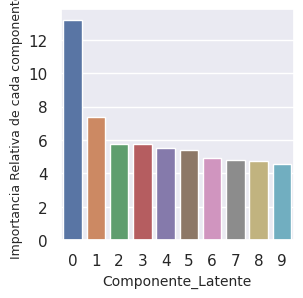

In [15]:
sns.set(rc={'figure.figsize':(3,3)}) 
chart = sns.barplot(x=list(range(len(Sigma))), y = Sigma )
chart.set_xlabel('Componente_Latente', fontdict={'size': 10})
chart.set_ylabel('Importancia Relativa de cada componente', fontdict={'size': 9})
plt.show()

### **Ejercicio 6**

**Obtener la matriz tokens-temas (*term-topic*) a partir de la matriz $V^T$ de la descomposición SVD.  Despliega sus primeros 5 renglones donde se incluya el nombre de las columnas.**  

In [16]:
# La matriz V-transpuesta es la que genera la relación Terms(word)-Topics,
# los renglones son los términos/words y las columnas los tópicos/temas:

lsi_term_topic = V_T 

print(lsi_term_topic.shape)

(98957, 10)


In [17]:
# rescatemos los nombres de los términos/tokens:

term_names = list(vectorizer.get_feature_names_out())

print(term_names)

['___guia_de_actuacio', '___tabla_resumen_y_ex', '__luisplanas', '_avt_', '_barallobre', '_deanfuentes', '_gafas_y_reloj_', '_la_epopeya_de_los_pilotos_de_la_rep', '_miguelhernan', '_obliga', '_vtxo', 'aa', 'aaas', 'aac', 'aaimlzvx', 'aaiún', 'aalla', 'aamir', 'aamma', 'aapp', 'aardman', 'aaron', 'aarron', 'aarts', 'aarón', 'abad', 'abades', 'abadeses', 'abadi', 'abadiño', 'abadía', 'abaitua', 'abajo', 'abalanza', 'abalanzamos', 'abalanzaron', 'abalanzándose', 'abalanzó', 'abalos', 'abalosmeco', 'abanca', 'abandera', 'abanderaban', 'abanderada', 'abanderadas', 'abanderado', 'abanderados', 'abanderando', 'abanderar', 'abandere', 'abanderen', 'abanderándose', 'abanderó', 'abandoibarra', 'abandona', 'abandonaba', 'abandonaban', 'abandonada', 'abandonadas', 'abandonado', 'abandonados', 'abandonament', 'abandonamos', 'abandonan', 'abandonando', 'abandonar', 'abandonara', 'abandonaran', 'abandonaremos', 'abandonarla', 'abandonarle', 'abandonarlo', 'abandonarlos', 'abandonaron', 'abandonarse'

In [31]:
# Y generamos un DataFrame con la matriz term-topic:

term_topic_matrix = pd.DataFrame(data=lsi_term_topic, 
                                 index = term_names,   
                                 columns = [f'Concepto_Latente_{r}' for r in range(0,V_T.shape[1])]
                                )

print(term_topic_matrix.shape)   #  words X topics

(98957, 10)


In [19]:
term_topic_matrix.head()    # los renglones son los terms/words 
                            # y las columnas los conceptos latentes o tópicos:

,Concepto_Latente_0,Concepto_Latente_1,Concepto_Latente_2,Concepto_Latente_3,Concepto_Latente_4,Concepto_Latente_5,Concepto_Latente_6,Concepto_Latente_7,Concepto_Latente_8,Concepto_Latente_9
___guia_de_actuacio,0.000136,0.000243,-0.000084,-0.000220,-0.000036,-0.000278,-0.000333,0.000372,-0.000308,-0.000215
___tabla_resumen_y_ex,0.000181,0.000229,-0.000152,-0.000374,-0.000147,-0.000259,-0.000307,0.000851,-0.000443,-0.000601
__luisplanas,0.000033,-0.000071,-0.000025,0.000053,-0.000059,-0.000004,0.000047,-0.000051,-0.000041,-0.000017
_avt_,0.000056,-0.000091,-0.000055,0.000015,-0.000041,0.000052,-0.000102,-0.000008,0.000047,-0.000155
_barallobre,0.000022,-0.000013,-0.000004,-0.000021,0.000017,0.000053,-0.000057,-0.000020,0.000023,-0.000013


### **Ejercicio 7**

**Con base a la cantidad de conceptos latentes que determinaste en el ejercicio 6 anterior, obtener  cada uno de sus gráficos con sus 10 términos/tokens más importantes. ¿Cómo describirías cada  uno de dichos conceptos latentes?** 

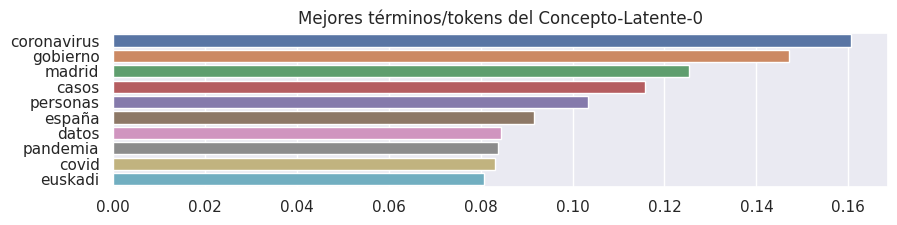

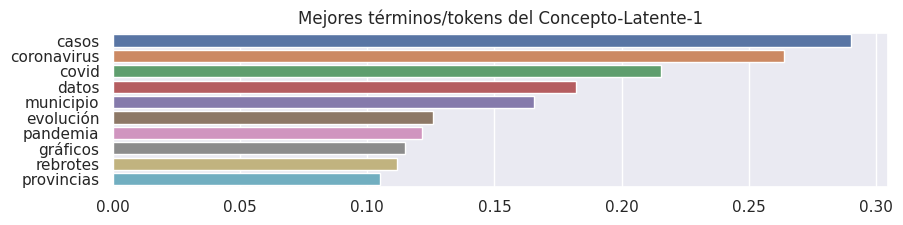

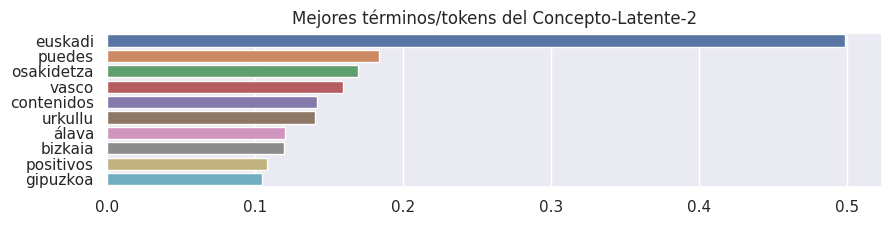

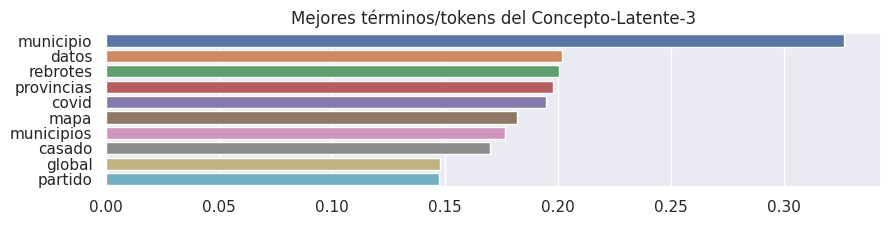

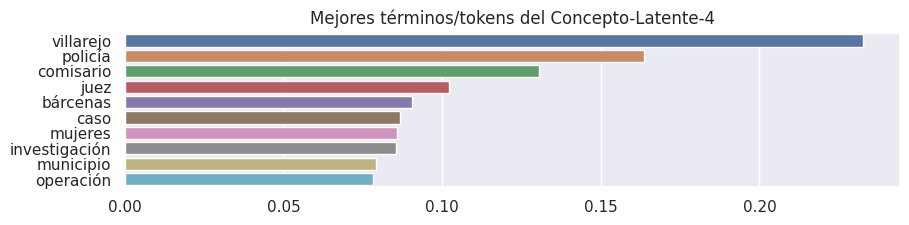

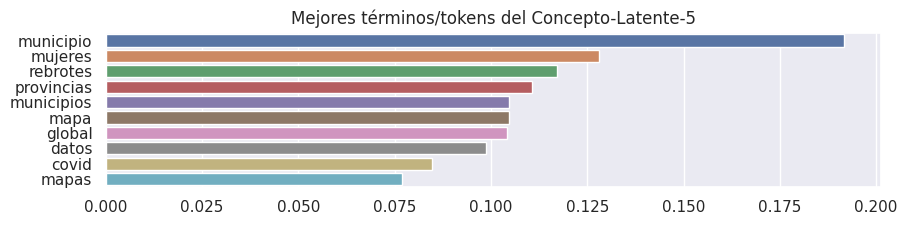

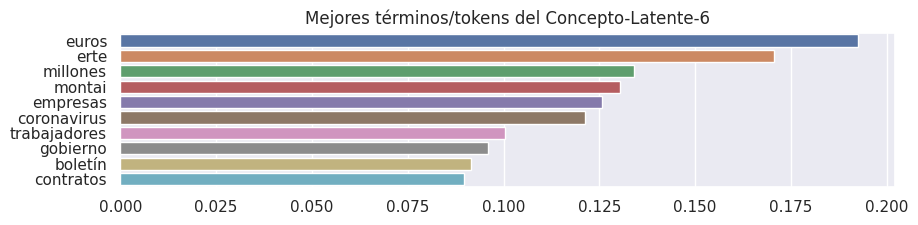

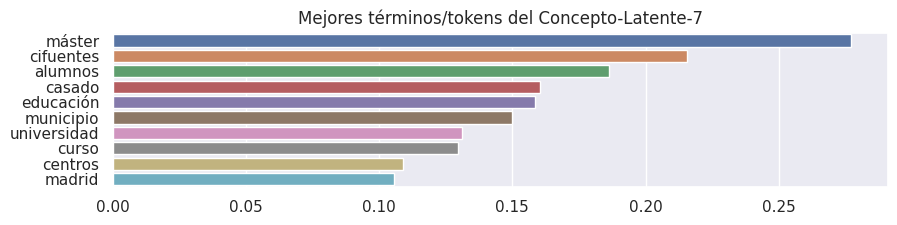

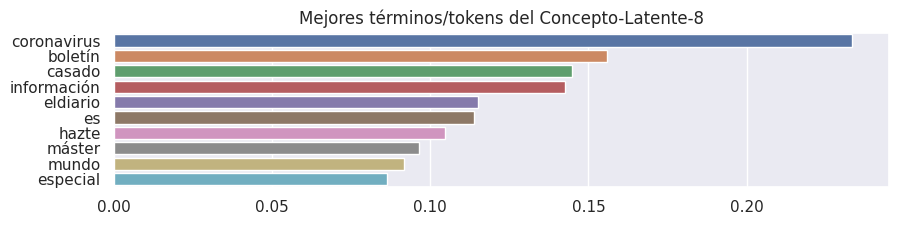

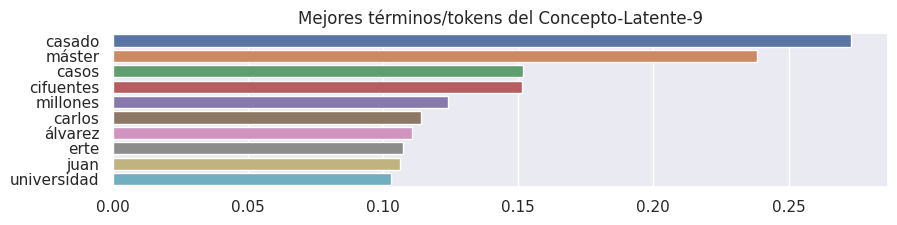

In [32]:
# Seleccionemos por ejemplo una de las columnas/tópico "Concepto_Latente":
for i, key in enumerate(term_topic_matrix):
  data = term_topic_matrix[key]

  # ordenamos lo valores singulares de la columna/tópico de manera descendente.
  data = data.sort_values(ascending=False) # Con la opción True, visualizarás los de menor peso.    

  top_w = 10      # Define la cantidad de las mejores "top_w" términos/words a visualizar.
  top_w_matrix = data[:top_w]    # Nos quedamos con los mejores top_w pesos, asociados a 
                                # los top_w terms (words).
  fig, ax = plt.subplots()
  sns.set(rc={'figure.figsize':(10,2)}) 
  plt.title(f'Mejores términos/tokens del Concepto-Latente-{i}')
  fig = sns.barplot(x= top_w_matrix.values, y=top_w_matrix.index)

### **Ejercicio 8**

**Para cada uno de los 10 conceptos latentes obtenidos con la descomposición SVD del ejercicio 5,  obtener el gráfico de barras que muestre los 10 términos/tokens más importantes de cada uno de  ellos.**  

### **Ejercicio 9**

**Con base a los resultados del ejercicio anterior, ¿cuántos tópicos o conceptos latentes identificas con claridad? ¿Cómo los describirías, es decir, de qué temáticas estarían hablando?**  

### **Ejercicio 10**

**La librería de código abierto Gensim, incluye la implementación de la técnica LSI. Ver documentación:** https://radimrehurek.com/gensim/models/lsimodel.html

**Investiga la documentación de este modelo LSI en Gensim y aplica dicha técnica a tu conjunto de datos. En particular, obtener los modelos de 2 a 10 temas/tópicos y para cada uno de ellos obtener su valor (*score*) de coherencia. Con base a dichos valores, ¿qué cantidad de tópicos sería el adecuado? ¿Coincide con lo que obtuviste previamente, usando la técnica SVD de manera directa?**  

In [65]:
from gensim import corpora, models
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel

In [ ]:
documents = df['texto'].tolist()

# Preprocesamos los documentos y creamos un diccionario
preprocessed_documents = [document.lower().split() for document in documents]
#dictionary = corpora.Dictionary(preprocessed_documents)

# Creamos un document-term matrix
#corpus = [dictionary.doc2bow(doc) for doc in preprocessed_documents]

preprocessed_documents[0:10]

In [74]:
# Convertimos el DataFrame a una lista de strings
documents = df['texto'].tolist()

# Partimos la lista de strings a una lista de lista de tokens
docs = [document.lower().split() for document in documents]

# Generamos el diccionario
mi_dicc = corpora.Dictionary(docs)

# Generamos la Bag of Words
bow = [mi_dicc.doc2bow(doc) for doc in docs]

In [77]:
for i in range(2,9):
    
    lsi = LsiModel(bow,
                   num_topics=i, 
                   id2word=mi_dicc,
                   chunksize=10,
                   random_seed=5
                  ) 
        
    
    cm = CoherenceModel(model=lsi, 
                        texts=docs, 
                        dictionary=mi_dicc, 
                        window_size=3,
                        coherence='c_v',
                        topn = 3
                       )
    
    cs = cm.get_coherence()
    
    print('Métrica de Coherencia con {} clusters: {}'.format(i, cs))

Métrica de Coherencia con 2 clusters: 0.49283370902602175
Métrica de Coherencia con 3 clusters: 0.6377336530557192
Métrica de Coherencia con 4 clusters: 0.6076160135231208
Métrica de Coherencia con 5 clusters: 0.6460958745241775
Métrica de Coherencia con 6 clusters: 0.5288723418626836
Métrica de Coherencia con 7 clusters: 0.6144128945883397
Métrica de Coherencia con 8 clusters: 0.6737270645872956


In [ ]:
# Seleccionas el mejor de los anteriores:

lsi = LsiModel(bow, 
               num_topics=3, 
               id2word=mi_dicc,
               chunksize=6,
               random_seed=7
               )

# Veamos la manera en que se distribuyen los términos en cada tópico generado:
for topic_num, words in lsi.print_topics(num_words=4):
    print('Tokens/Words in Topic {}: {}.'.format(topic_num, words))

# **Parte 2: Asignación de Dirichlet Latente (LDA):**

### **Ejercicio 11**

**Utiliza la librería Gensim para implementar ahora la técnica de LDA. Revisa la documentación correspondiente y aplica de preferencia el modelo paralelizable:**

https://radimrehurek.com/gensim/models/ldamodel.html

https://radimrehurek.com/gensim/models/ldamulticore.html

In [ ]:
# Los documentos a analizar:
docs

# Generamos el diccionario:
id2word = corpora.Dictionary(docs)

for id in range(7):
    print(id2word[id])

In [ ]:
# Generamos el corpus con las tuplas (índice, frecuencia):

corpus = [id2word.doc2bow(doc) for doc in docs]
corpus

In [ ]:
# Siempre podemos expresar cada documento con palabras para un mejor entendimiento:
[[(id2word[id], fre) for id, fre in cor] for cor in corpus[:2]]

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                    id2word=id2word,
                    num_topics=4,       # total de tópicos que deseas buscar...
                    chunksize=10,        # número de documentos a analizar en cada chunk de entrenamiento
                    passes=10,          # número de pasadas al corpus durante el entrenamiento.
                    alpha=0.2,          # alfa: similaridad document-topics
                    eta=0.2,            # beta: similaridad topic-words      
                    )

In [ ]:
lda_model.print_topics(num_topics=4, num_words=4)

### **Ejercicio 12**

**Con base a esta técnica,**
- **¿qué cantidad de tópicos consideras que es la más adecuada?**

**Compara tus resultados con el método LSI.**
- **¿Qué encuentras de coincidencias y diferencias?**
- **¿Cuál consideras puede ser el mejor resultado, es decir, cuál consideras puede ser la mejor cantidad de tópicos a considerar?**

### **Ejercicio 13**

**La librería pyLDAvis nos ayuda a visualizar de manera interactiva los temas y tokens de los documentos analizados. Revisa la documentación y utilízala para visualizar tus mejor resultado.**

https://pypi.org/project/pyLDAvis/  

### **Ejercicio 14**

**Incluye tus conclusiones finales de la actividad.**